# Train ECG Denosier

__Date created:__ 2024/08/13 

__Last Modified:__ 2024/07/17 

__Description:__ Train, evaluate, and export ECG denoiser model from scratch


## Overview 

In this guide, we will train an ECG denoiser to remove noise and artifacts from raw ECG signals. 
Once trained, we demonstrate how to evaluate the model and export it for inference for both TF Lite and TF Lite for Micro.

__Input__

- **Sensor**: ECG 
- **Location**: Wrist
- **Sampling Rate**: 100 Hz
- **Frame Size**: 2.56 seconds

__Datasets__

- **[Synthetic](https://ambiqai.github.io/heartkit/datasets/synthetic/)**: Synthetic ECG signals from PhysioKit
- **[PTB-XL](https://ambiqai.github.io/heartkit/datasets/ptbxl/)**: The PTB-XL is a large publicly available electrocardiography dataset. 
It contains 21837 clinical 12-lead ECGs from 18885 patients of 10 second length. The ECGs are sampled at 500 Hz and are annotated by up to two cardiologists.

<!-- This should be added to the overrides/main.html and improved-->
<div class="grid cards" markdown>

- <svg xmlns="http://www.w3.org/2000/svg" height="50" width="50" viewBox="0 0 488 512"><!--!Font Awesome Free 6.6.0 by @fontawesome - https://fontawesome.com License - https://fontawesome.com/license/free Copyright 2024 Fonticons, Inc.--><path fill="#2094F3" d="M488 261.8C488 403.3 391.1 504 248 504 110.8 504 0 393.2 0 256S110.8 8 248 8c66.8 0 123 24.5 166.3 64.9l-67.5 64.9C258.5 52.6 94.3 116.6 94.3 256c0 86.5 69.1 156.6 153.7 156.6 98.2 0 135-70.4 140.8-106.9H248v-85.3h236.1c2.3 12.7 3.9 24.9 3.9 41.4z"/></svg>
<a href="https://colab.research.google.com/github/AmbiqAI/heartkit/blob/canary/docs/guides/train-arrhythmia-model.ipynb" class="md-content__button md-icon" style="color: #2094F3;">
    View in Colab
</a>

- <svg xmlns="http://www.w3.org/2000/svg" height="50" width="50" viewBox="0 0 496 512"><!--!Font Awesome Free 6.6.0 by @fontawesome - https://fontawesome.com License - https://fontawesome.com/license/free Copyright 2024 Fonticons, Inc.--><path fill="#2094F3" d="M165.9 397.4c0 2-2.3 3.6-5.2 3.6-3.3 .3-5.6-1.3-5.6-3.6 0-2 2.3-3.6 5.2-3.6 3-.3 5.6 1.3 5.6 3.6zm-31.1-4.5c-.7 2 1.3 4.3 4.3 4.9 2.6 1 5.6 0 6.2-2s-1.3-4.3-4.3-5.2c-2.6-.7-5.5 .3-6.2 2.3zm44.2-1.7c-2.9 .7-4.9 2.6-4.6 4.9 .3 2 2.9 3.3 5.9 2.6 2.9-.7 4.9-2.6 4.6-4.6-.3-1.9-3-3.2-5.9-2.9zM244.8 8C106.1 8 0 113.3 0 252c0 110.9 69.8 205.8 169.5 239.2 12.8 2.3 17.3-5.6 17.3-12.1 0-6.2-.3-40.4-.3-61.4 0 0-70 15-84.7-29.8 0 0-11.4-29.1-27.8-36.6 0 0-22.9-15.7 1.6-15.4 0 0 24.9 2 38.6 25.8 21.9 38.6 58.6 27.5 72.9 20.9 2.3-16 8.8-27.1 16-33.7-55.9-6.2-112.3-14.3-112.3-110.5 0-27.5 7.6-41.3 23.6-58.9-2.6-6.5-11.1-33.3 2.6-67.9 20.9-6.5 69 27 69 27 20-5.6 41.5-8.5 62.8-8.5s42.8 2.9 62.8 8.5c0 0 48.1-33.6 69-27 13.7 34.7 5.2 61.4 2.6 67.9 16 17.7 25.8 31.5 25.8 58.9 0 96.5-58.9 104.2-114.8 110.5 9.2 7.9 17 22.9 17 46.4 0 33.7-.3 75.4-.3 83.6 0 6.5 4.6 14.4 17.3 12.1C428.2 457.8 496 362.9 496 252 496 113.3 383.5 8 244.8 8zM97.2 352.9c-1.3 1-1 3.3 .7 5.2 1.6 1.6 3.9 2.3 5.2 1 1.3-1 1-3.3-.7-5.2-1.6-1.6-3.9-2.3-5.2-1zm-10.8-8.1c-.7 1.3 .3 2.9 2.3 3.9 1.6 1 3.6 .7 4.3-.7 .7-1.3-.3-2.9-2.3-3.9-2-.6-3.6-.3-4.3 .7zm32.4 35.6c-1.6 1.3-1 4.3 1.3 6.2 2.3 2.3 5.2 2.6 6.5 1 1.3-1.3 .7-4.3-1.3-6.2-2.2-2.3-5.2-2.6-6.5-1zm-11.4-14.7c-1.6 1-1.6 3.6 0 5.9 1.6 2.3 4.3 3.3 5.6 2.3 1.6-1.3 1.6-3.9 0-6.2-1.4-2.3-4-3.3-5.6-2z"/></svg>
<a href="https://github.com/AmbiqAI/heartkit/blob/canary/docs/guides/train-ecg-denoiser.ipynb" class="md-content__button md-icon" style="color: #2094F3;">
    GitHub source
</a>

</div>

In [32]:
!pip install -q --disable-pip-version-check heartkit

## Setup

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import contextlib
from pathlib import Path
import tempfile
import keras
import heartkit as hk
import tensorflow as tf
import numpy as np
import neuralspot_edge as nse
import matplotlib.pyplot as plt

os.environ['DATASET_PATH'] = '../datasets'

## Constants

Here we provide the constants that we will use throughout the guide. For better performance, adjust parameters as needed such as `BATCH_SIZE`, `EPOCHS`, and `LEARNING_RATE`.

In [2]:
# File paths
datasets_dir = Path(os.getenv("DATASET_PATH", "./datasets"))
job_dir = Path(tempfile.gettempdir()) / "hk-ecg-denoiser"
model_file = job_dir / "model.keras"

# Data settings
sampling_rate = 100             # 100 Hz
frame_size = 256                # 2.56 seconds
num_synthetic_patients = 10000  # Number of synthetic patients

# Training settings
batch_size = 256                # Batch size for training
buffer_size = 25000             # How many samples are shuffled each epoch
epochs = 100                    # Increase this to 100+ for better results
steps_per_epoch = 50            # Steps per epoch (must set since ds has unknown size)
samples_per_patient = 5         # Number of samples per patient
val_samples_per_patient = 10    # Number of samples per patient for validation
val_metric = "loss"
val_mode = "min"
val_size = 10000                # Number of samples used for validation
val_percentage = 0.2            # Percentage of samples used for validation
learning_rate = 1e-3            # Learning rate for Adam optimizer
epsilon = 0.01

# Other settings
seed = 42                       # Seed for reproducibility
verbose = 1                     # Verbosity level
plot_theme = hk.utils.dark_theme


In [3]:
nse.utils.silence_tensorflow()
hk.utils.setup_plotting(plot_theme)
logger = nse.utils.setup_logger(__name__, level=verbose)

os.makedirs(job_dir, exist_ok=True)
logger.info(f"Job directory: {job_dir}")


INFO     Job directory: /tmp/hk-ecg-denoiser                                                        ]8;id=653937;file:///tmp/ipykernel_1619872/1872153631.py\1872153631.py]8;;\:]8;id=196438;file:///tmp/ipykernel_1619872/1872153631.py#6\6]8;;\

## Configure datasets

Capturing noise-free ECG signals is challenging due to the presence of various artifacts. Therefore, we use a combination of synthetic and controlled, real-world datasets as our training data. HeartKit exposes an ECG Synthetic dataset generator provided by PhysioKit. 


In [4]:
datasets = [
    hk.NamedParams(
        name="ecg-synthetic",
        params=dict(
            num_pts=num_synthetic_patients,
            params=dict(
                presets=["SR", "AFIB", "ant_STEMI", "LAHB", "LPHB", "high_take_off", "LBBB", "random_morphology"],
                preset_weights=[24, 8, 1, 1, 1, 1, 1, 0],
                duration=10,
                sample_rate=sampling_rate,
                heart_rate=[40, 160],
                impedance=[1, 2],
                p_multiplier=[0.7, 1.3],
                t_multiplier=[0.7, 1.3],
                noise_multiplier=[0, 0.01],
                voltage_factor=[800, 1000]
            )
        )
    ),
    hk.NamedParams(
        name="ptbxl",
        params=dict(
            path=datasets_dir / "ptbxl",
        )
    )
]


### Download the datasets

We will download the synthetic and PTB-XL datasets using `heartkit`. If already downloaded, this step will be skipped.

In [5]:
hk.datasets.download_datasets(hk.HKDownloadParams(
    datasets=datasets,
    force=False,
    progress=True
))

### Create data pipeline

Next, we will create a `tf.data` pipeline by performing the following steps on each dataset: 
* Loading dataset class handler 
* Leverage task specific data loader for given dataset
* Splittiing the dataset into training and validation sets
* Creating `tf.data.Dataset` objects for training and validation

After creating all the `tf.data.Dataset` objects, we will merge them into a single dataset for training and validation. 


In [6]:
# Load datasets
dsets = [hk.DatasetFactory.get(ds.name)(**ds.params) for ds in datasets]

In [7]:
dset_weights = np.array([0.9, 0.1])

train_datasets = []
val_datasets = []
for ds in dsets:
    # Create dataloader
    dataloader = hk.tasks.denoise.DenoiseDataloader(
        ds=ds,
        frame_size=frame_size,
        sampling_rate=sampling_rate,
    )

    # Split patients into train and validation sets
    train_patients, val_patients = dataloader.split_train_val_patients()

    # Create train dataset
    train_ds = dataloader.create_dataloader(
        patient_ids=train_patients,
        samples_per_patient=samples_per_patient,
        shuffle=True
    )

    # Create validation dataset
    val_ds = dataloader.create_dataloader(
        patient_ids=val_patients,
        samples_per_patient=samples_per_patient,
        shuffle=False
    )
    train_datasets.append(train_ds)
    val_datasets.append(val_ds)
# END FOR

# Combine datasets
train_ds = tf.data.Dataset.sample_from_datasets(train_datasets, weights=dset_weights)
val_ds = tf.data.Dataset.sample_from_datasets(val_datasets, weights=dset_weights)


100%|██████████| 10000/10000 [01:34<00:00, 105.77it/s]
I0000 00:00:1723573260.884713 1619872 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723573260.904235 1619872 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723573260.904314 1619872 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723573260.905752 1619872 cuda_ex

### Visualize the data

Let's visualize a sample ECG signal from the synthetic dataset. Note this contains no noise or artifacts. Augmentations will be applied later to generate noisy samples for training.

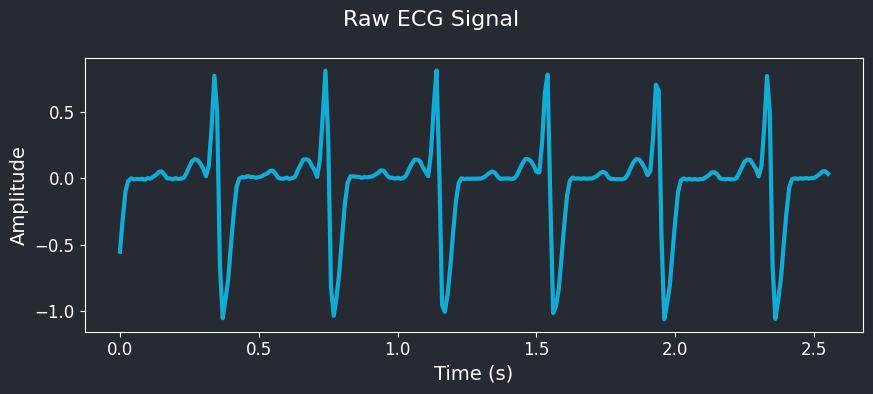

In [8]:
ecg = next(iter(train_ds)).numpy()

ts = np.arange(0, len(ecg)) / sampling_rate
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
ax.plot(ts, ecg, color=plot_theme.primary_color, lw=3)
fig.suptitle("Raw ECG Signal")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
fig.tight_layout()
fig.show()


### Create augmentation pipeline

Since our goal is to denoise ECG signals, we need to create an augmentation pipeline to generate noisy samples. 

We will leverage `neuralspot-edge` preprocessing layers to create the following augmentations:

* Baseline wander: Simulate baseline wander by adding a low frequency sine signal
* Powerline noise: Simulate powerline noise by adding a 50 Hz sinusoidal signal 
* Amplitude warp: Simulate amplitude warp by randomly scaling along a low frequency sine wave
* Gaussian noise: Simulate lead noise by adding random noise following a Gaussian distribution
* Background noise: Add real noise captured from NSTDB dataset


In [9]:
nstdb = hk.datasets.nstdb.NstdbNoise(target_rate=sampling_rate)
noises = np.hstack((nstdb.get_noise(noise_type="bw"), nstdb.get_noise(noise_type="ma"), nstdb.get_noise(noise_type="em")))
noises = noises.astype(np.float32)

preprocessor = nse.layers.preprocessing.LayerNormalization1D(
    epsilon=epsilon,
    name="LayerNormalization"
)

augmenter = nse.layers.preprocessing.AugmentationPipeline(
    layers=[
        nse.layers.preprocessing.RandomNoiseDistortion1D(
            sample_rate=sampling_rate,
            amplitude=(0.05, 1.0),
            frequency=(0.5, 1.5),
            name="BaselineWander"
        ),
        nse.layers.preprocessing.RandomSineWave(
            sample_rate=sampling_rate,
            amplitude=(0, 0.05),
            frequency=(45, 50),
            name="PowerlineNoise"
        ),
        nse.layers.preprocessing.AmplitudeWarp(
            sample_rate=sampling_rate,
            amplitude=(0.9, 1.1),
            frequency=(0.5, 1.5),
            name="AmplitudeWarp"
        ),
        nse.layers.preprocessing.RandomGaussianNoise1D(
            factor=(0.05, 0.25),
            name="GaussianNoise"
        ),
        nse.layers.preprocessing.RandomBackgroundNoises1D(
            noises=noises,
            amplitude=(0.05, 0.25),
            num_noises=1,
            name="RandomBackgroundNoises"
        ),
    ],
)

### Visualize augmented data

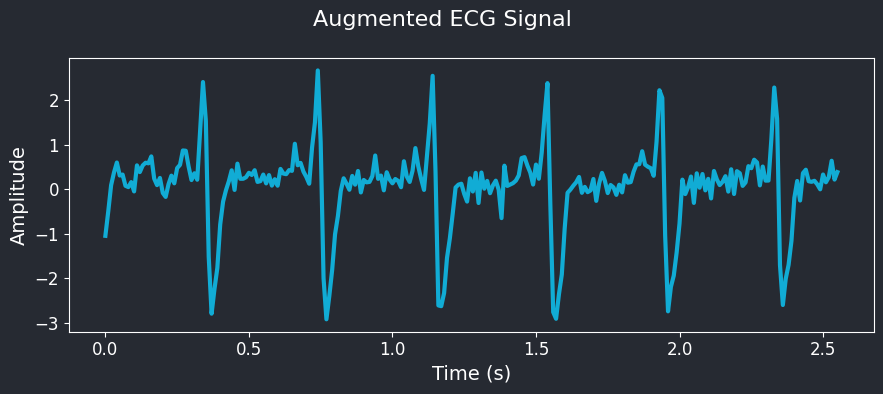

In [10]:
aug_ecg = augmenter(preprocessor(keras.ops.convert_to_tensor(np.reshape(ecg, (1, -1, 1)))), training=True)
aug_ecg = aug_ecg.numpy().squeeze()

ts = np.arange(0, len(aug_ecg)) / sampling_rate
fig, ax = plt.subplots(1, 1, figsize=(9, 4))
plt.plot(ts, aug_ecg, color=plot_theme.primary_color, lw=3)
fig.suptitle("Augmented ECG Signal")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Amplitude")
plt.tight_layout()
plt.show()

## Create full data pipeline w/ augmentation

We will now create a full data pipeline by extended the original with shuffling, batching, augmentations, and prefetching.

For validation, we will cache a subset of the validation data to speed up the evaluation process.

In [11]:
train_ds = train_ds.shuffle(
    buffer_size=buffer_size,
    reshuffle_each_iteration=True,
).batch(
    batch_size=batch_size,
    drop_remainder=True,
    num_parallel_calls=tf.data.AUTOTUNE,
).map(
    preprocessor,
    num_parallel_calls=tf.data.AUTOTUNE
).map(
    lambda x: (augmenter(x, training=True), x),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(
    tf.data.AUTOTUNE
)

val_ds = val_ds.batch(
    batch_size=batch_size,
    drop_remainder=True,
    num_parallel_calls=tf.data.AUTOTUNE,
).map(
    preprocessor,
    num_parallel_calls=tf.data.AUTOTUNE
).map(
    lambda x: (augmenter(x, training=True), x),
    num_parallel_calls=tf.data.AUTOTUNE
).prefetch(
    tf.data.AUTOTUNE
)

# Cache the validation dataset
val_ds = val_ds.take(val_size//batch_size).cache()

## Define TCN model architecture

For this task, we are going to leverage a customized __TCN__ model architecture that is smaller and can handle 1D signals. The model consists of 5 TCN blocks with a depth of 1. Each block leverages dilated depthwise-separable convolutions along with inverted expansion and squeeze and excitation layers. The model is followed by a 1D convolutional layer. 

In [12]:
mbconv_blocks = [
    dict(depth=1, branch=1, filters=16, kernel=(1, 7), dilation=(1, 1), dropout=0, ex_ratio=1, se_ratio=0, norm="batch"),
    dict(depth=1, branch=1, filters=24, kernel=(1, 7), dilation=(1, 1), dropout=0, ex_ratio=1, se_ratio=2, norm="batch"),
    dict(depth=1, branch=1, filters=32, kernel=(1, 7), dilation=(1, 2), dropout=0, ex_ratio=1, se_ratio=2, norm="batch"),
    dict(depth=1, branch=1, filters=40, kernel=(1, 7), dilation=(1, 4), dropout=0, ex_ratio=1, se_ratio=2, norm="batch"),
    dict(depth=1, branch=1, filters=48, kernel=(1, 7), dilation=(1, 8), dropout=0, ex_ratio=1, se_ratio=2, norm="batch")
]

architecture = dict(
    name="tcn",
    params=dict(
        input_kernel=(1, 7),
        input_norm="batch",
        blocks=mbconv_blocks,
        output_kernel=(1, 7),
        include_top=True,
        use_logits=True,
        model_name="tcn"
    )
)


### Visualize the model

Let's view the first several layers of the model to understand the architecture better.

In [13]:
model = nse.models.tcn.tcn_from_object(
    x=keras.Input(shape=(frame_size, 1), name='inputs'),
    params=architecture["params"],
    num_classes=1
)
model.summary(layer_range=('inputs', 'B3.D1.DW.B1.CN'))

Model: "TCN"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer) │ (None, 256, 1)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 256, 1) │          0 │ inputs[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ENC.CN              │ (None, 1, 256, 1) │          7 │ reshape[0][0]     │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ENC.BN              │ (None, 1, 256, 1) │          4 │ ENC.CN[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.DW.B1.CN      │ (None, 1, 256, 1) │          7 │ ENC.BN[0][0]      │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.DW.B1.BN      │ (None, 1, 256, 1) │          4 │ B1.D1.DW.B1.CN[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.DW.ACT        │ (None, 1, 256, 1) │          0 │ B1.D1.DW.B1.BN[0… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.PW.B1.CN      │ (None, 1, 256,    │         16 │ B1.D1.DW.ACT[0][… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.PW.B1.BN      │ (None, 1, 256,    │         64 │ B1.D1.PW.B1.CN[0… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1.D1.PW.ACT        │ (None, 1, 256,    │          0 │ B1.D1.PW.B1.BN[0… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B2.D1.DW.B1.CN      │ (None, 1, 256,    │        112 │ B1.D1.PW.ACT[0][… │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B2.D1.DW.B1.BN      │ (None, 1, 256,    │         64 │ B2.D1.DW.B1.CN[0… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B2.D1.DW.ACT        │ (None, 1, 256,    │          0 │ B2.D1.DW.B1.BN[0… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B2.D1.SE.pool       │ (None, 1, 1, 16)  │          0 │ B2.D1.DW.ACT[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B2.D1.SE.sq.conv    │ (None, 1, 1, 8)   │        136 │ B2.D1.SE.pool[0]… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B2.D1.SE.sq.act     │ (None, 1, 1, 8)   │          0 │ B2.D1.SE.sq.conv… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B2.D1.SE.ex.conv    │ (None, 1, 1, 16)  │        144 │ B2.D1.SE.sq.act[… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 10,223 (39.93 KB)

 Trainable params: 9,675 (37.79 KB)

 Non-trainable params: 548 (2.14 KB)

## Compile the model

We will compile the model using Adam optimizer with cosine learning rate scheduler and mean squared error loss function. We will also attach metrics and callbacks to monitor the training process.


In [14]:
t_mul = 1
lr_cycles = 1
first_steps = (steps_per_epoch * epochs) / (np.power(lr_cycles, t_mul) - t_mul + 1)
scheduler = keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=learning_rate,
    first_decay_steps=np.ceil(first_steps),
    t_mul=t_mul,
    m_mul=0.5,
)
optimizer = keras.optimizers.Adam(scheduler)
loss = keras.losses.MeanSquaredError()

metrics = [
    keras.metrics.MeanAbsoluteError(name="mae"),
    keras.metrics.MeanSquaredError(name="mse"),
    keras.metrics.CosineSimilarity(name="cos"),
    nse.metrics.Snr(name="snr"),
]

model_callbacks = [
    keras.callbacks.EarlyStopping(
        monitor=f"val_{val_metric}",
        patience=max(int(0.25 * epochs), 1),
        mode=val_mode,
        restore_best_weights=True,
        verbose=min(verbose - 1, 1),
    ),
    keras.callbacks.ModelCheckpoint(
        filepath=str(model_file),
        monitor=f"val_{val_metric}",
        save_best_only=True,
        save_weights_only=False,
        mode=val_mode,
        verbose=min(verbose - 1, 1),
    ),
    keras.callbacks.CSVLogger(job_dir / "history.csv"),
]

In [15]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
flops = nse.metrics.flops.get_flops(model, batch_size=1, fpath=os.devnull)
logger.info(f"Model requires {flops/1e6:0.2f} MFLOPS")

INFO     Model requires 3.02 MFLOPS                                                                 ]8;id=119005;file:///tmp/ipykernel_1619872/1319647386.py\1319647386.py]8;;\:]8;id=942841;file:///tmp/ipykernel_1619872/1319647386.py#3\3]8;;\

## Train the model

In [16]:
history = model.fit(
    train_ds,
    steps_per_epoch=steps_per_epoch,
    verbose=verbose,
    epochs=epochs,
    validation_data=val_ds,
    callbacks=model_callbacks,
)

Epoch 1/100


I0000 00:00:1723573267.969050 1620307 service.cc:146] XLA service 0x797c7800b300 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723573267.969070 1620307 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9


13/50 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - cos: 0.1119 - loss: 1.8925 - mae: 0.8850 - mse: 1.5532 - snr: -4.3028

I0000 00:00:1723573276.273866 1620307 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 ━━━━━━━━━━━━━━━━━━━━ 16s 51ms/step - cos: 0.1007 - loss: 1.3767 - mae: 0.7174 - mse: 1.0393 - snr: -4.2311 - val_cos: 0.2703 - val_loss: 1.0319 - val_mae: 0.3945 - val_mse: 0.7054 - val_snr: -0.0017
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - cos: 0.2336 - loss: 0.5753 - mae: 0.3641 - mse: 0.2541 - snr: 3.7060 - val_cos: 0.2679 - val_loss: 1.0092 - val_mae: 0.3928 - val_mse: 0.7053 - val_snr: -0.0016
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - cos: 0.3244 - loss: 0.4547 - mae: 0.2796 - mse: 0.1569 - snr: 6.1683 - val_cos: 0.2662 - val_loss: 0.9830 - val_mae: 0.3954 - val_mse: 0.7038 - val_snr: 0.0078
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - cos: 0.4013 - loss: 0.3898 - mae: 0.2370 - mse: 0.1169 - snr: 7.7768 - val_cos: 0.1827 - val_loss: 0.9553 - val_mae: 0.3978 - val_mse: 0.7007 - val_snr: 0.0266
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - cos: 0.4554 - loss: 0.3489 - mae: 0.2162 - mse: 0.1003 - snr: 8.4476 - val_cos: 0.1883 - val_loss:

### Visualize training history

Let's visualize the training history to understand the model's performance during training. This will help to ensure the model is learning and not under or overfitting.

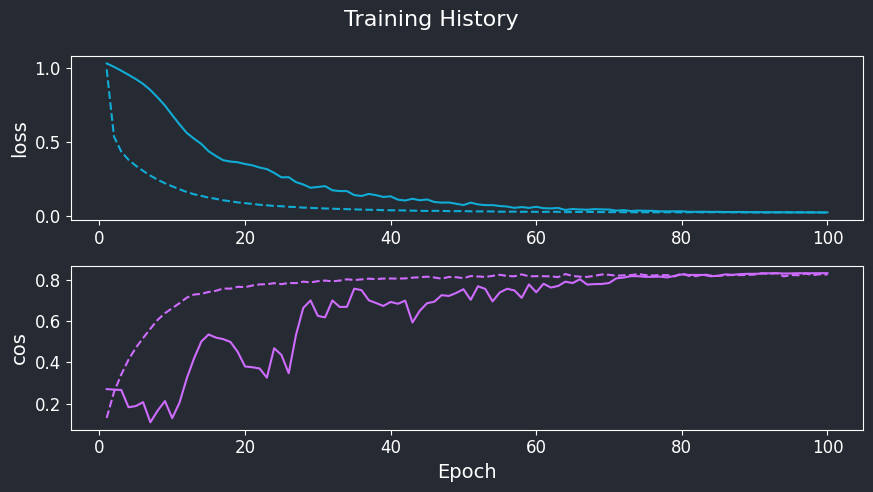

In [17]:
fig, _ = nse.plotting.plot_history_metrics(
    history.history,
    metrics=["loss", "cos"],
    title="Training History",
    colors=[plot_theme.primary_color, plot_theme.secondary_color],
    stack=True,
    figsize=(9, 5),
)
fig.tight_layout()
fig.show()

## Model evaluation

Now that we have trained the model, we will evaluate the model on the test dataset. The model's built-in `evaluate` method will be used to calculate the loss and metrics on the dataset.

In [18]:
rst = model.evaluate(val_ds, return_dict=True)
logger.info("[VAL SET] " + ", ".join([f"{k.upper()}={v:.4f}" for k, v in rst.items()]))

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - cos: 0.8275 - loss: 0.0258 - mae: 0.0831 - mse: 0.0173 - snr: 16.1862


INFO     [VAL SET] COS=0.8313, LOSS=0.0254, MAE=0.0814, MSE=0.0169, SNR=16.1837                      ]8;id=332795;file:///tmp/ipykernel_1619872/935393270.py\935393270.py]8;;\:]8;id=588225;file:///tmp/ipykernel_1619872/935393270.py#2\2]8;;\

## Export model to TF Lite / TFLM

Once we have trained and evaluated the model, we need to export the model into a format that can be used for inference on the edge. Currently, we export the model to TensorFlow Lite flatbuffer format. This will also generate a C header file that can be used with TensorFlow Lite for Microcontrollers (TFLM).

For this model, we will export as a 32-bit floating point model.
 
__NOTE:__ We utilize `CONCRETE` mode to lower the model to concrete functions before converting. This is because TF (MLIR) fails to properly lower the dilated convolutional layers.

In [19]:
# Convert validation dataset to numpy arrays
test_x = np.concatenate([x for x, _ in val_ds.as_numpy_iterator()])
test_y = np.concatenate([y for _, y in val_ds.as_numpy_iterator()])


In [20]:
converter = nse.converters.tflite.TfLiteKerasConverter(model=model)

# Redirect stdout and stderr to devnull since TFLite converter is very verbose
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull), contextlib.redirect_stderr(devnull):
        tflite_content = converter.convert(
            test_x=test_x,
            quantization="FP32",
            io_type="float32",
            mode="KERAS",
            strict=False,
            verbose=verbose
        )

W0000 00:00:1723573422.366791 1619872 tf_tfl_flatbuffer_helpers.cc:392] Ignored output_format.
W0000 00:00:1723573422.366803 1619872 tf_tfl_flatbuffer_helpers.cc:395] Ignored drop_control_dependency.


### Save TFLite model as both a file and C header

In [21]:
converter.export(
    tflite_path=job_dir / "model.tflite"
)

converter.export_header(
    header_path=job_dir / "model.h",
    name="model",
)


### Evaluate TFLite model against TensorFlow model

We will instantiate a tflite interpreter and evaluate the model on the test dataset. This will help us ensure that the model has been exported correctly and is ready for deployment.

In [22]:
tflite = nse.interpreters.tflite.TfLiteKerasInterpreter(tflite_content)
tflite.compile()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [23]:
y_true = test_y
y_pred_tf = model.predict(test_x)
y_pred_tfl = tflite.predict(x=test_x)

312/312 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [24]:
tf_rst = nse.metrics.compute_metrics(metrics, y_true, y_pred_tf)
tfl_rst = nse.metrics.compute_metrics(metrics, y_true, y_pred_tfl)
logger.info("[TF METRICS] " + " ".join([f"{k.upper()}={v:.4f}" for k, v in tf_rst.items()]))
logger.info("[TFL METRICS] " + " ".join([f"{k.upper()}={v:.4f}" for k, v in tfl_rst.items()]))

INFO     [TF METRICS] MAE=0.0814 MSE=0.0169 COS=0.8313 SNR=16.2114                                   ]8;id=370040;file:///tmp/ipykernel_1619872/776805021.py\776805021.py]8;;\:]8;id=166028;file:///tmp/ipykernel_1619872/776805021.py#3\3]8;;\

INFO     [TFL METRICS] MAE=0.0814 MSE=0.0169 COS=0.8313 SNR=16.2097                                  ]8;id=881444;file:///tmp/ipykernel_1619872/776805021.py\776805021.py]8;;\:]8;id=427708;file:///tmp/ipykernel_1619872/776805021.py#4\4]8;;\

## ECG Denoising Demo

Finally, we will demonstrate how to use the trained ECG denoiser model to remove noise and artifacts from raw ECG signals. We will load a sample ECG signal, add noise to it, and then denoise it using the trained model. We will visualize the original, noisy, and denoised ECG signals to compare the results.

In [25]:
sample_idx = np.random.randint(0, len(test_x))
ecg = test_y[sample_idx].squeeze()
aug_ecg = test_x[sample_idx].squeeze()
clean_ecg = model.predict(np.reshape(aug_ecg, (1, -1, 1)))
snr = nse.metrics.Snr()
snr.update_state(ecg.reshape(1, -1, 1), aug_ecg.reshape(1, -1, 1))
aug_snr = snr.result().numpy()
snr.reset_state()
snr.update_state(ecg.reshape(1, -1, 1), clean_ecg.reshape(1, -1, 1))
clean_snr = snr.result().numpy()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 729ms/step


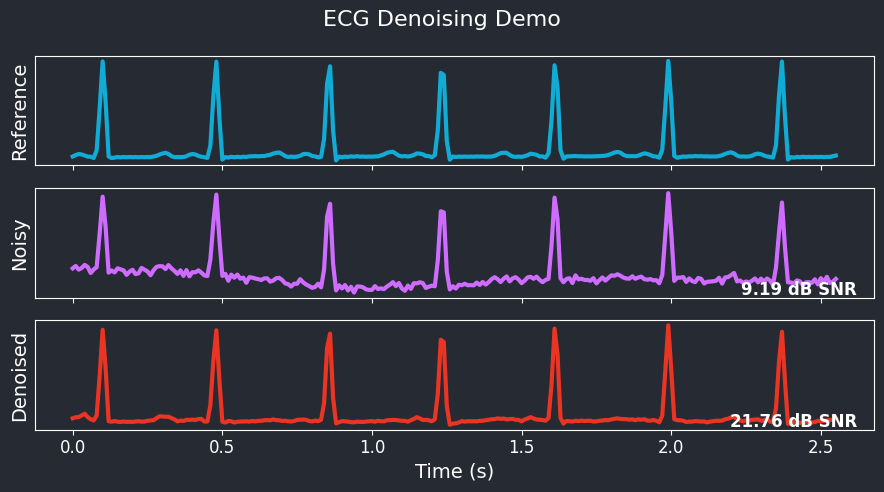

In [26]:
fig, ax = plt.subplots(3, 1, figsize=(9, 5), sharex=True)
ax[0].plot(ts, ecg.squeeze(), color=plot_theme.primary_color, lw=3)
ax[1].plot(ts, aug_ecg.squeeze(), color=plot_theme.secondary_color, lw=3)
ax[2].plot(ts, clean_ecg.squeeze(), color=plot_theme.tertiary_color, lw=3)

ax[0].set_ylabel("Reference")
ax[1].set_ylabel("Noisy")
ax[2].set_ylabel("Denoised")

ax[1].text(0.98, 0.15, f"{aug_snr:4.02f} dB SNR", transform=ax[1].transAxes, ha="right", va="top", weight='bold')
ax[2].text(0.98, 0.15, f"{clean_snr:4.02f} dB SNR", transform=ax[2].transAxes, ha="right", va="top", weight='bold')
# Disable y-axis ticks for all plots
for axes in ax:
    axes.yaxis.set_ticks([])
ax[-1].set_xlabel("Time (s)")
fig.suptitle("ECG Denoising Demo")
fig.tight_layout()
fig.show()